In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

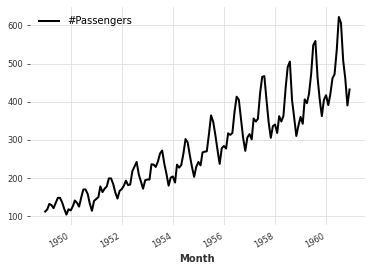

In [3]:
series = AirPassengersDataset().load()
series.plot()

In [4]:
from darts.utils.statistics import plot_acf, check_seasonality

C:\Users\hou\miniconda3\envs\time-series\lib\site-packages\darts\timeseries.py:3006: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(key, (pd.Int64Index, pd.RangeIndex)):


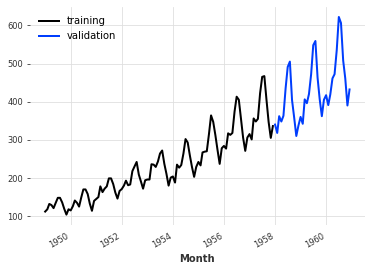

In [5]:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

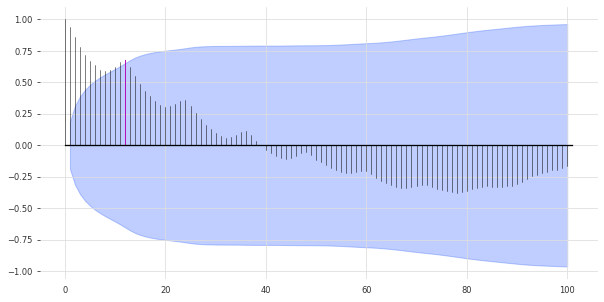

In [6]:
plot_acf(train, m=12, alpha=0.05, max_lag=100)

In [7]:
for m in range(2,25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=2, max_lag=100)
    if is_seasonal:
        print(f"the period is {period}")

the period is 12
the period is 24


In [8]:
x,y = check_seasonality(train, m=12, alpha=0.05)

In [9]:
x,y

(True, 12)

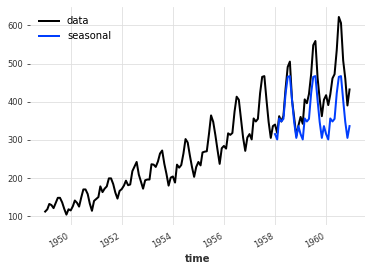

In [10]:
from darts.models import NaiveSeasonal
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_model_forecast = seasonal_model.predict(len(val))

series.plot(label='data')
seasonal_model_forecast.plot(label='seasonal')

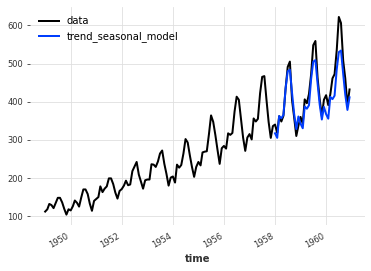

In [11]:
from darts.models import NaiveDrift

trend_model = NaiveDrift()
trend_model.fit(train)
trend_model_forcast = trend_model.predict(36)
combined_model_forecast = trend_model_forcast + seasonal_model_forecast - train.last_value()

series.plot(label="data")
combined_model_forecast.plot(label="trend_seasonal_model")

In [12]:
from darts.metrics import mape
print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(series, combined_model_forecast)
    )
)

Mean absolute percentage error for the combined naive drift + seasonal: 5.66%.


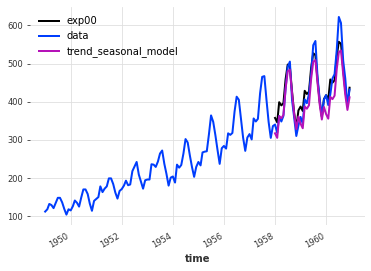

In [15]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode
trend= ModelMode.ADDITIVE
seasonal = ModelMode.ADDITIVE
exp00_model = ExponentialSmoothing(trend=trend, seasonal=seasonal)
exp00_model.fit(train)
exp00_forecast = exp00_model.predict(len(val))
exp00_forecast.plot(label="exp00")
series.plot(label="data")
combined_model_forecast.plot(label="trend_seasonal_model")
# label=f"exp_trend={trend}_seasonal={seasonal}")



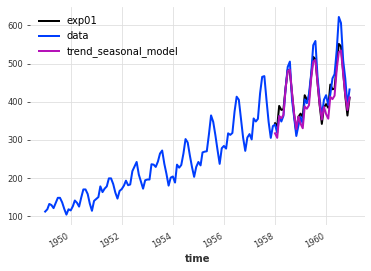

In [17]:
trend= ModelMode.ADDITIVE
seasonal = ModelMode.MULTIPLICATIVE
exp01_model = ExponentialSmoothing(trend=trend, seasonal=seasonal)
exp01_model.fit(train)
exp01_forecast = exp01_model.predict(len(val))
exp01_forecast.plot(label="exp01")
series.plot(label="data")
combined_model_forecast.plot(label="trend_seasonal_model")


C:\Users\hou\miniconda3\envs\time-series\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


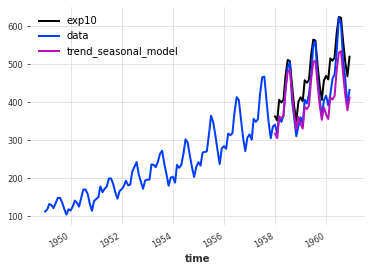

In [18]:
trend= ModelMode.MULTIPLICATIVE
seasonal = ModelMode.ADDITIVE
exp10_model = ExponentialSmoothing(trend=trend, seasonal=seasonal)
exp10_model.fit(train)
exp10_forecast = exp10_model.predict(len(val))
exp10_forecast.plot(label="exp10")
series.plot(label="data")
combined_model_forecast.plot(label="trend_seasonal_model")


C:\Users\hou\miniconda3\envs\time-series\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


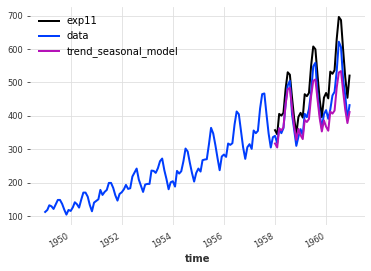

In [19]:
trend= ModelMode.MULTIPLICATIVE
seasonal = ModelMode.MULTIPLICATIVE
exp11_model = ExponentialSmoothing(trend=trend, seasonal=seasonal)
exp11_model.fit(train)
exp11_forecast = exp11_model.predict(len(val))
exp11_forecast.plot(label="exp11")
series.plot(label="data")
combined_model_forecast.plot(label="trend_seasonal_model")


In [20]:
print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(series, combined_model_forecast))
    )

print (
 "for ExponentialSmoothing(trend= additive, seasonal= additive): {:.2f}%.".format(mape(series, exp00_forecast))
)

print (
 "for ExponentialSmoothing(trend= additive, seasonal= multiplicative): {:.2f}%.".format(mape(series, exp01_forecast))
)

print (
 "for ExponentialSmoothing(trend= multiplicative, seasonal= additive): {:.2f}%.".format(mape(series, exp10_forecast))
)

print (
 "for ExponentialSmoothing(trend= multiplicative, seasonal= multiplicative): {:.2f}%.".format(mape(series, exp11_forecast))
)



Mean absolute percentage error for the combined naive drift + seasonal: 5.66%.
for ExponentialSmoothing(trend= additive, seasonal= additive): 5.11%.
for ExponentialSmoothing(trend= additive, seasonal= multiplicative): 5.07%.
for ExponentialSmoothing(trend= multiplicative, seasonal= additive): 10.76%.
for ExponentialSmoothing(trend= multiplicative, seasonal= multiplicative): 13.02%.
